In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import sklearn 
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
from tqdm.auto import tqdm

In [68]:
Data = pd.read_csv("./breath_csv_2/Breath.csv")

In [69]:
unique = np.unique(Data.iloc[:,73])
asthmatic = np.array([i for i in unique if i.find("sthma") != -1])
B = pd.DataFrame()
for i in asthmatic:
    B = B.append(Data[Data.iloc[:,73] == i])
B.iloc[:,72] = 1
B.reset_index(inplace=True,drop=True )

In [70]:
B

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.992360,-17.386529,-3.713637,-3.191119,5.859474,0.345634,-10.617331,-1.752087,2.475118,2.693879,...,11.000591,11.910034,13.120485,9.530460,8.976875,8.839848,13.681052,9.747090,1,4012_P_Asthma_F_after_Mil_Y.json
1,-1.523400,-18.528801,-3.163837,-6.871339,5.111507,-0.585330,-8.495219,0.488026,0.083253,-0.440658,...,9.600833,11.383878,11.788427,11.197872,8.518983,7.830064,10.458960,9.223463,1,4012_P_Asthma_F_after_Mil_Y.json
2,-1.411141,-20.331110,-1.113288,-6.023631,4.993796,0.388513,-7.779792,-0.079205,2.259564,1.239153,...,9.406953,10.682132,11.434059,8.112442,7.457294,7.759565,8.713331,7.292228,1,4012_P_Asthma_F_after_Mil_Y.json
3,-2.155340,-24.558919,-3.045152,-6.510205,6.475217,-3.859762,-8.772067,-1.342511,-0.905882,-0.410696,...,8.981799,13.038493,11.325451,9.754742,8.704969,8.122480,11.141158,8.056709,1,4012_P_Asthma_F_after_Mil_Y.json
4,-2.007399,-22.700796,-4.947997,-6.363454,6.387438,-2.575076,-7.979208,3.622297,1.294504,2.566039,...,9.235723,12.688381,10.722323,8.588885,8.292685,7.478709,12.817434,8.821254,1,4012_P_Asthma_F_after_Mil_Y.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,-3.898049,-7.233605,-1.025047,-5.777293,-0.724047,-5.892306,4.370627,0.144697,10.008242,-2.132467,...,10.162204,11.357441,11.456590,11.242080,15.842389,9.685064,10.915464,12.693437,1,4992_P_Asthma_F_before_Sev_Y.json
1474,-4.285375,-8.433305,0.270769,-8.100339,3.341875,-9.133463,5.029009,-1.403047,8.877016,0.170385,...,10.009282,12.645159,10.762908,9.100924,12.699652,9.542287,8.789426,9.129319,1,4992_P_Asthma_F_before_Sev_Y.json
1475,-3.811823,-9.903934,-3.772771,-7.583742,-4.782840,-12.172118,3.788461,0.497483,5.728714,-1.118452,...,10.430437,18.370319,11.829051,12.468859,15.646574,10.682694,10.980994,12.933565,1,4992_P_Asthma_F_before_Sev_Y.json
1476,-3.923348,-7.312954,-0.023111,-11.368536,-4.578872,-10.603922,2.769039,-6.529305,8.070058,-1.383550,...,13.333003,15.144048,11.818425,13.294185,14.625092,10.264452,10.587764,10.356953,1,4992_P_Asthma_F_before_Sev_Y.json


### Experiment 1 Asthmatic 

#### 1.1 Before patients only

In [71]:
C = pd.DataFrame()
before = [i for i in unique if i.find("efore") != -1]
for i in before:
    C = C.append(B[B.iloc[:,73] == i])
male = [i for i in before if i.find("_M_")!=-1]
female = [i for i in before if i.find("_F_")!=-1]

In [41]:
D = pd.DataFrame()
for i in female:
    D = D.append(C[C.iloc[:,73] == i])
D.iloc[:,72] = 0
for i in male:
    D= D.append(C[C.iloc[:,73] == i])
    

In [42]:
D.reset_index(drop=True, inplace=True)

In [43]:
shuffle(D).head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
238,-0.606622,-0.579070,-11.580526,-6.829303,-0.529547,-0.550265,0.700014,-0.882925,0.062196,-0.391136,...,7.172326,7.732205,10.711189,9.390855,7.149672,8.858256,8.290566,8.701495,0,4897_P_NAsthma_F_before_TBD_Y.json
409,-0.735961,-16.472858,1.068748,-5.265336,-2.701142,-7.655200,-5.101993,-11.428194,2.229653,-4.977001,...,11.482024,10.902024,11.373871,15.957771,8.443654,9.443673,9.589233,8.938524,1,4384_P_Asthma_M_before_TBD_N.json
186,-3.726179,-19.128965,-12.809990,0.108995,-1.265889,14.413514,-6.222393,-11.790356,1.753618,7.862033,...,7.535623,18.918907,12.851044,15.853720,8.523831,14.312331,10.013347,9.773896,0,4660_P_Asthma_F_before_Sev_Y.json
109,-2.715810,-10.396337,-7.554041,-2.716548,4.173561,-1.077384,-6.799632,-4.730961,2.955523,4.564122,...,11.512466,8.757101,10.610603,10.086827,10.149765,8.819525,8.043635,7.284064,0,4464_P_Asthma_F_before_TBD_Y.json
277,0.290197,-6.391446,1.239657,-0.985071,-0.019252,-3.948284,-5.858277,-8.682248,4.577973,4.314024,...,11.072355,11.246243,11.923381,12.160588,10.331380,10.312001,10.239549,8.368155,1,4017_P_Asthma_M_before_Mil_Y.json


In [10]:
def count(list_array, print_dist = True, ret = None):
    Total = list_array
    name = []
    for i in Total:
        name.append(i[:4])
    unique = []
    before_after = []
    for i in Total:
        if np.sum((np.array(name, dtype = int) == int(i[:4]))) == 1:
            unique.append(i)
        else:
            before_after.append(i) 

    Asthmatic_Female = []
    Asthmatic_Male = []
    Healthy_Male = []
    Healthy_Female = []
    NAsthma = {"male": [], "female": []}
    before = {"male" : [], "female" : []}
    after = {"male" : [], "female" : []}
    for file in unique:
        if file.split("_")[2] == 'Asthma' or file.split("_")[2] == 'asthma' :
            if file.find("_M_")!=-1:
                Asthmatic_Male.append(file)
            if file.find("_F_")!=-1:
                Asthmatic_Female.append(file)
        if file.split("_")[2] == 'NAsthma':
            if file.find("_M_") != -1:
                NAsthma["male"].append(file)
            else:
                NAsthma["female"].append(file)
                
        if file.find("_C_")!=-1:
            if file.find("_M_")!=-1:
                Healthy_Male.append(file)
            if file.find("_F_")!=-1:
                Healthy_Female.append(file)

    for file in before_after:
            if file.find("efore") != -1:
                if file.find("_M_") != -1 or file.find("_m_")!=-1:
                    before["male"].append(file)
                if file.find("_F_")!=-1:
                    before["female"].append(file)
            if file.find("fter")!= -1:
                if file.find("_M_") != -1 or file.find("_m_")!=-1:
                    after["male"].append(file)
                if file.find("_F_")!=-1:
                    after["female"].append(file)
    if print_dist:
        print(f"Total = {len(Total)}")
        print(f"Asthmatic_male = {len(Asthmatic_Male)+ len(before['male'])+len(after['male'])}")
        print(f"Asthmatic_female = {len(Asthmatic_Female)+ len(before['female'])+len(after['female'])}")
        print(f"Healthy_Male = {len(Healthy_Male)}")
        print(f"Healthy_female = {len(Healthy_Female)}")
        print(f"Asthmatic_male_unique = {len(Asthmatic_Male)}")
        print(f"Asthmatic_female_unique = {len(Asthmatic_Female)}")
        print(f"Before_after = {len(before_after)}")
        print(f"Before_male = {len(before['male'])}")
        print(f"Before_female = {len(before['female'])}")
        print(f"after_male = {len(after['male'])}")
        print(f"after_female = {len(after['female'])}")
        print(f"NAsthma Male = {len(NAsthma['male'])}")
        print(f"NAsthma Female = {len(NAsthma['female'])}")
        
              
    if ret != None:
        D = {"Total": Total, "Asthmatic_male": Asthmatic_Male, "Asthmatic_female": Asthmatic_Female, "Healthy_Male": Healthy_Male,
            "Healthy_Female": Healthy_Female, "before_after": before_after, "before": before, "after": after}
        return D[ret]

In [45]:
count(list(np.unique(D.iloc[:,73])))

Total = 67
Asthmatic_male = 34
Asthmatic_female = 27
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 34
Asthmatic_female_unique = 27
Before_after = 0
Before_male = 0
Before_female = 0
after_male = 0
after_female = 0
NAsthma Male = 2
NAsthma Female = 4


In [46]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,3):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(before,Test)
    np.savetxt(f"./male_female_classification/Experiment_1/1.1/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_1/1.1/Test/test_{str(i)}.txt", Test[0], '%s')

In [18]:
# Training and Testing
# C = shuffle(C, random_state= 22) 
def experiment(dataframe, path, svm_c = 1, svm_gamma = 'auto', plot = True):
    C = dataframe
    Test_accuracy = []
    Test_F1 = []
    Train_accuracy = []
    Train_F1 = []
    AUC = []

    FPR = []
    TPR = []
    THRESH = []

    for i in tqdm(range(0,3)):
        Train_dataframe = pd.DataFrame()
        Test_dataframe = pd.DataFrame()
        Train = np.loadtxt(f"./male_female_classification/{path}/Train/train_{str(i)}.txt", 'str')
        Test = np.loadtxt(f"./male_female_classification/{path}/Test/test_{str(i)}.txt", 'str')

        for j in range(0,len(Train)):
            Train_dataframe = Train_dataframe.append(C[C.iloc[:,73] == Train[j]])

        for j in range(0,len(Test)):
            Test_dataframe = Test_dataframe.append(C[C.iloc[:,73] == Test[j]]) 


        Train_dataframe = shuffle(Train_dataframe, random_state= 42)

        scaler = StandardScaler()
        scaler.fit(C.iloc[:,:72])

        X_train = pd.DataFrame(scaler.transform(Train_dataframe.iloc[:,:72]))
        y_train = Train_dataframe.iloc[:,72]
        X_test = pd.DataFrame(scaler.transform(Test_dataframe.iloc[:,:72]))
        y_test = Test_dataframe.iloc[:,72]

        X_train.reset_index(drop=True, inplace= True)
        X_test.reset_index(drop=True, inplace= True)
        y_train.reset_index(drop=True, inplace= True)
        y_test.reset_index(drop=True, inplace= True)


        model = svm.SVC(C = svm_c,gamma=svm_gamma, probability=True)
        model.fit(X_train,y_train)

        Train_accuracy.append(metrics.accuracy_score(y_train, model.predict(X_train)))
        Test_accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))

        Train_F1.append(metrics.f1_score(y_train, model.predict(X_train)))
        Test_F1.append(metrics.f1_score(y_test, model.predict(X_test))) 

        pred_prob = model.predict_proba(X_test)
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
        auc_score = roc_auc_score(y_test, pred_prob[:,1])
        FPR.append(fpr)
        TPR.append(tpr)
        THRESH.append(thresh)
        AUC.append(auc_score)
    if plot == True:
        plt.style.use('seaborn')
        color = ['orange', 'green', 'yellow', 'black', 'red']
        for i in range(0, len(AUC)):
            plt.plot(FPR[i], TPR[i], linestyle='--',color=color[i], label=f'model_{str(i)}_AUC:{AUC[i]}')

        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
#         plt.savefig('ROC_Male_female_classification_',dpi=300)
        plt.show();

        print(f"Mean Test Accuracy:{np.mean(Test_accuracy)*100}% with SD: {np.std(Test_accuracy)*100}%")
        print(f"Mean Train Accuracy:{np.mean(Train_accuracy)*100}%")
        print(f"Mean Test F1:{np.mean(Test_F1)*100}% with SD: {np.std(Test_F1)*100}%")
        print(f"Mean Test AUC:{np.mean(AUC)*100}% with SD: {np.std(AUC)*100}%")
        
    return Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1

  0%|          | 0/3 [00:00<?, ?it/s]

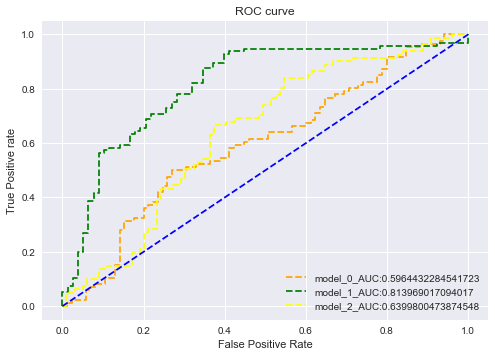

Mean Test Accuracy:66.86596760099482% with SD: 7.6511634581114745%
Mean Train Accuracy:100.0%
Mean Test F1:68.30730599320238% with SD: 10.291531542787194%
Mean Test AUC:68.34640976452148% with SD: 9.397699772093574%


In [53]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_1/1.1', svm_c=5)

#### 1.2 After Patients M/F

In [54]:
C = pd.DataFrame()
after = [i for i in unique if i.find("fter") != -1]
for i in after:
    C = C.append(B[B.iloc[:,73] == i])
male = [i for i in after if i.find("_M_")!=-1]
female = [i for i in after if i.find("_F_")!=-1]

In [55]:
D = pd.DataFrame()
for i in female:
    D = D.append(C[C.iloc[:,73] == i])
D.iloc[:,72] = 0
for i in male:
    D= D.append(C[C.iloc[:,73] == i])

In [56]:
count(list(np.unique(D.iloc[:,73])))

Total = 101
Asthmatic_male = 56
Asthmatic_female = 41
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 56
Asthmatic_female_unique = 41
Before_after = 0
Before_male = 0
Before_female = 0
after_male = 0
after_female = 0
NAsthma Male = 2
NAsthma Female = 2


In [57]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,4):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(after,Test)
    np.savetxt(f"./male_female_classification/Experiment_1/1.2/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_1/1.2/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/3 [00:00<?, ?it/s]

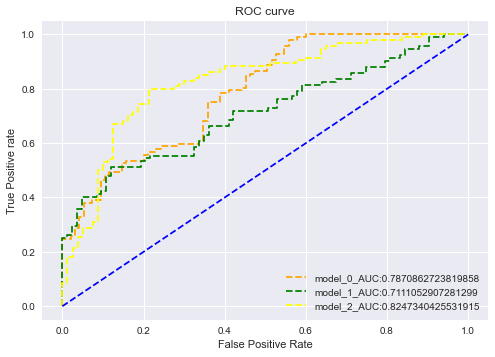

Mean Test Accuracy:69.36155582922825% with SD: 3.9880598870825663%
Mean Train Accuracy:96.92348962479129%
Mean Test F1:73.19584005083331% with SD: 4.412293059839654%
Mean Test AUC:77.43085352211024% with SD: 4.726045729461947%


In [58]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_1/1.2')

#### 1.3 All astmatic

In [23]:
male = [i for i in (np.unique(B.iloc[:,73])) if i.find("_M_")!=-1]
female = [i for i in (np.unique(B.iloc[:,73])) if i.find("_F_")!=-1]

In [24]:
D = pd.DataFrame()
for i in female:
    D = D.append(B[B.iloc[:,73] == i])
D.iloc[:,72] = 0
for i in male:
    D= D.append(B[B.iloc[:,73] == i])

In [25]:
count(list(np.unique(D.iloc[:,73])))

Total = 168
Asthmatic_male = 90
Asthmatic_female = 68
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 46
Asthmatic_female_unique = 28
Before_after = 84
Before_male = 22
Before_female = 20
after_male = 22
after_female = 20
NAsthma Male = 4
NAsthma Female = 6


In [62]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,4):
    Test = []
    Test.append(list(np.concatenate((male[i*15:15+i*15],female[i*15:15+i*15]))))
    Train = np.setdiff1d(list(np.unique(D.iloc[:,73])),Test)
    np.savetxt(f"./male_female_classification/Experiment_1/1.3/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_1/1.3/Test/test_{str(i)}.txt", Test[0], '%s')

In [77]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_1/1.3')

  0%|          | 0/5 [00:00<?, ?it/s]

ValueError: Found array with 0 sample(s) (shape=(0, 72)) while a minimum of 1 is required by StandardScaler.

### Experiment_2: Healthy Controls

In [55]:
unique = np.unique(Data.iloc[:,73])
controls = np.array([i for i in unique if i.find("_C_") != -1])
B = pd.DataFrame()
for i in controls:
    B = B.append(Data[Data.iloc[:,73] == i])
# B.iloc[:,72] = 1
B.reset_index(inplace=True,drop=True )

In [56]:
male = [i for i in (np.unique(B.iloc[:,73])) if i.find("_M_")!=-1]
female = [i for i in (np.unique(B.iloc[:,73])) if i.find("_F_")!=-1]

In [57]:
D = pd.DataFrame()
for i in male:
    D= D.append(B[B.iloc[:,73] == i])

D.iloc[:,72] = 1

for i in female:
    D = D.append(B[B.iloc[:,73] == i])


In [58]:
count(list(np.unique(D.iloc[:,73])))

Total = 106
Asthmatic_male = 0
Asthmatic_female = 0
Healthy_Male = 55
Healthy_female = 51
Asthmatic_male_unique = 0
Asthmatic_female_unique = 0
Before_after = 0
Before_male = 0
Before_female = 0
after_male = 0
after_female = 0
NAsthma Male = 0
NAsthma Female = 0


In [82]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,5):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(list(np.unique(D.iloc[:,73])),Test)
    np.savetxt(f"./male_female_classification/Experiment_2/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_2/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/5 [00:00<?, ?it/s]

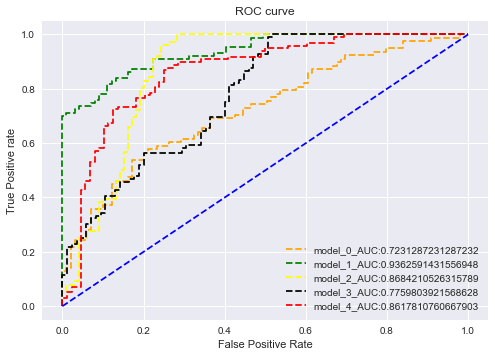

Mean Test Accuracy:73.80412423480973% with SD: 6.590032179358228%
Mean Train Accuracy:89.01327877104235%
Mean Test F1:74.91950029896532% with SD: 7.195511788393029%
Mean Test AUC:83.311407742793% with SD: 7.492438861405787%


In [83]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_2/', svm_c = 0.1)

### Experiment 3 Taking both Asthmatic and Healthy Patients

In [80]:
unique = np.unique(Data.iloc[:,73])
male = [i for i in unique if i.find("_M_")!=-1]
female = [i for i in unique if i.find("_F_")!=-1]

In [81]:
Data.iloc[:,72] = 0
D = pd.DataFrame()
for i in male:
    D= D.append(Data[Data.iloc[:,73] == i])

D.iloc[:,72] = 1

for i in female:
    D = D.append(Data[Data.iloc[:,73] == i])


In [82]:
count(list(np.unique(D.iloc[:,73])))

Total = 274
Asthmatic_male = 90
Asthmatic_female = 68
Healthy_Male = 55
Healthy_female = 51
Asthmatic_male_unique = 46
Asthmatic_female_unique = 28
Before_after = 84
Before_male = 22
Before_female = 20
after_male = 22
after_female = 20
NAsthma Male = 4
NAsthma Female = 6


In [83]:
male = shuffle(male)
female = shuffle(female)
for i in range(0,5):
    Test = []
    Test.append(list(np.concatenate((male[i*20:20+i*20],female[i*20:20+i*20]))))
    Train = np.setdiff1d(list(np.unique(D.iloc[:,73])),Test)
    np.savetxt(f"./male_female_classification/Experiment_3/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_3/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/3 [00:00<?, ?it/s]

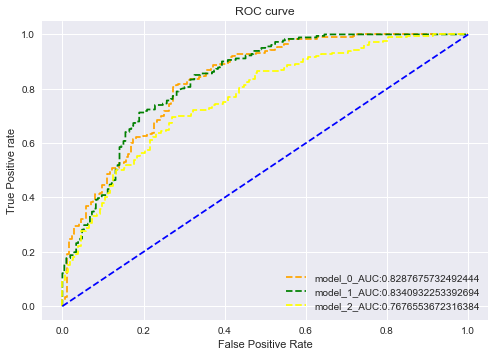

Mean Test Accuracy:72.69380784520528% with SD: 3.0571219152788576%
Mean Train Accuracy:92.34256078611854%
Mean Test F1:75.66729361414093% with SD: 2.2817362424468786%
Mean Test AUC:81.0172055273384% with SD: 3.014235352540052%


In [84]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_3/', svm_c = 0.5)

### Removing imbalace in data

### Experiment_4

In [17]:
# after only with balaced subjects as before[exp_1.1]

In [85]:
C = pd.DataFrame()
after = [i for i in unique if i.find("fter") != -1]
for i in after:
    C = C.append(B[B.iloc[:,73] == i])
male = [i for i in after if i.find("_M_")!=-1]
female = [i for i in after if i.find("_F_")!=-1]

In [86]:
C

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.992360,-17.386529,-3.713637,-3.191119,5.859474,0.345634,-10.617331,-1.752087,2.475118,2.693879,...,11.000591,11.910034,13.120485,9.530460,8.976875,8.839848,13.681052,9.747090,1,4012_P_Asthma_F_after_Mil_Y.json
1,-1.523400,-18.528801,-3.163837,-6.871339,5.111507,-0.585330,-8.495219,0.488026,0.083253,-0.440658,...,9.600833,11.383878,11.788427,11.197872,8.518983,7.830064,10.458960,9.223463,1,4012_P_Asthma_F_after_Mil_Y.json
2,-1.411141,-20.331110,-1.113288,-6.023631,4.993796,0.388513,-7.779792,-0.079205,2.259564,1.239153,...,9.406953,10.682132,11.434059,8.112442,7.457294,7.759565,8.713331,7.292228,1,4012_P_Asthma_F_after_Mil_Y.json
3,-2.155340,-24.558919,-3.045152,-6.510205,6.475217,-3.859762,-8.772067,-1.342511,-0.905882,-0.410696,...,8.981799,13.038493,11.325451,9.754742,8.704969,8.122480,11.141158,8.056709,1,4012_P_Asthma_F_after_Mil_Y.json
4,-2.007399,-22.700796,-4.947997,-6.363454,6.387438,-2.575076,-7.979208,3.622297,1.294504,2.566039,...,9.235723,12.688381,10.722323,8.588885,8.292685,7.478709,12.817434,8.821254,1,4012_P_Asthma_F_after_Mil_Y.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,-1.358456,-3.729112,-10.899681,-0.613525,3.069748,3.477375,0.425693,2.780043,5.582689,5.996354,...,7.944895,7.542159,7.042260,8.242379,9.421225,9.907508,11.253067,9.793820,1,4992_P_Asthma_F_after_Sev_Y.json
1463,-1.129676,-2.369505,-11.606666,0.770269,3.132194,3.852709,1.336174,3.116404,5.655070,8.605508,...,7.871873,7.749192,7.018632,7.965631,9.473883,11.679445,11.238594,10.336377,1,4992_P_Asthma_F_after_Sev_Y.json
1464,-1.194540,-4.107991,-13.671056,-0.281925,2.590399,4.228518,2.156723,3.510308,7.156223,9.304099,...,6.393527,7.889974,7.400828,8.998104,10.603092,11.927402,11.768478,11.673900,1,4992_P_Asthma_F_after_Sev_Y.json
1465,-1.313305,-2.893475,-13.823813,0.286691,1.445507,4.997350,-0.043124,3.621600,5.396817,10.618988,...,6.477577,8.482641,6.487944,8.198357,9.720932,13.380915,10.547506,11.408625,1,4992_P_Asthma_F_after_Sev_Y.json


In [87]:
D = pd.DataFrame()
for i in female:
    D = D.append(C[C.iloc[:,73] == i])
D.iloc[:,72] = 0
for i in male:
    D= D.append(C[C.iloc[:,73] == i])

In [89]:
D

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.992360,-17.386529,-3.713637,-3.191119,5.859474,0.345634,-10.617331,-1.752087,2.475118,2.693879,...,11.000591,11.910034,13.120485,9.530460,8.976875,8.839848,13.681052,9.747090,0,4012_P_Asthma_F_after_Mil_Y.json
1,-1.523400,-18.528801,-3.163837,-6.871339,5.111507,-0.585330,-8.495219,0.488026,0.083253,-0.440658,...,9.600833,11.383878,11.788427,11.197872,8.518983,7.830064,10.458960,9.223463,0,4012_P_Asthma_F_after_Mil_Y.json
2,-1.411141,-20.331110,-1.113288,-6.023631,4.993796,0.388513,-7.779792,-0.079205,2.259564,1.239153,...,9.406953,10.682132,11.434059,8.112442,7.457294,7.759565,8.713331,7.292228,0,4012_P_Asthma_F_after_Mil_Y.json
3,-2.155340,-24.558919,-3.045152,-6.510205,6.475217,-3.859762,-8.772067,-1.342511,-0.905882,-0.410696,...,8.981799,13.038493,11.325451,9.754742,8.704969,8.122480,11.141158,8.056709,0,4012_P_Asthma_F_after_Mil_Y.json
4,-2.007399,-22.700796,-4.947997,-6.363454,6.387438,-2.575076,-7.979208,3.622297,1.294504,2.566039,...,9.235723,12.688381,10.722323,8.588885,8.292685,7.478709,12.817434,8.821254,0,4012_P_Asthma_F_after_Mil_Y.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,-5.818181,-0.679102,-3.417771,-5.163316,-0.114181,1.871554,4.366716,-7.356478,6.247771,10.448479,...,7.277587,7.991772,8.367754,11.694334,10.599144,14.461568,8.160175,9.713181,1,4988_P_Asthma_M_after_Sev_Y.json
1458,-5.717664,-0.919604,-0.881685,-4.823220,4.534859,0.377943,6.702185,-7.408381,3.413222,5.915749,...,8.316307,8.372858,10.224255,10.106665,9.289670,12.033573,7.691732,9.453777,1,4988_P_Asthma_M_after_Sev_Y.json
1459,-5.649800,-2.382268,-2.305830,-1.490987,5.970491,0.827769,3.344421,-9.016931,4.768282,3.777887,...,8.255556,7.402344,8.493884,13.131373,9.482041,9.371477,8.907050,8.679297,1,4988_P_Asthma_M_after_Sev_Y.json
1460,-5.873533,-4.011465,-2.562932,-1.310558,4.698535,3.517529,5.918996,-8.988270,4.713659,5.022226,...,7.159782,7.607532,9.888231,11.776083,9.402566,10.741790,8.308089,8.700772,1,4988_P_Asthma_M_after_Sev_Y.json


In [90]:
count(list(np.unique(D.iloc[:,73])))

Total = 101
Asthmatic_male = 56
Asthmatic_female = 41
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 56
Asthmatic_female_unique = 41
Before_after = 0
Before_male = 0
Before_female = 0
after_male = 0
after_female = 0
NAsthma Male = 2
NAsthma Female = 2


In [91]:
male = shuffle(np.random.choice(male, size = 36, replace = False))
female = shuffle(np.random.choice(female, size = 31, replace = False))
for i in range(0,3):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(after,Test)
    np.savetxt(f"./male_female_classification/Experiment_4/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_4/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/3 [00:00<?, ?it/s]

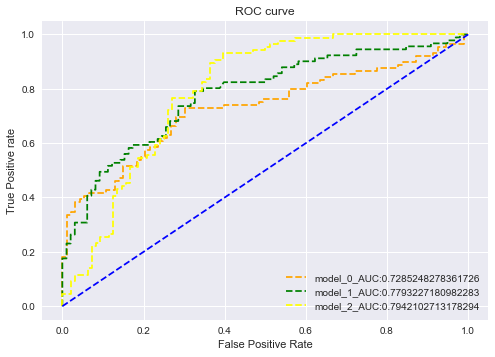

Mean Test Accuracy:67.44675078008412% with SD: 3.8183758332388282%
Mean Train Accuracy:96.62802414695251%
Mean Test F1:71.19536598209582% with SD: 3.741404880111972%
Mean Test AUC:76.73526057507432% with SD: 2.812006476467223%


In [92]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_4/')

### Experiment 5: All asthmatic

In [95]:
male = [i for i in (np.unique(B.iloc[:,73])) if i.find("_M_")!=-1]
female = [i for i in (np.unique(B.iloc[:,73])) if i.find("_F_")!=-1]

In [96]:
male = shuffle(np.random.choice(male, size = 36, replace = False))
female = shuffle(np.random.choice(female, size = 31, replace = False))
for i in range(0,3):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(list(np.unique(D.iloc[:,73])),Test)
    np.savetxt(f"./male_female_classification/Experiment_5/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_5/Test/test_{str(i)}.txt", Test[0], '%s')

In [97]:
Total = np.concatenate((male,female))

In [98]:
Test = []
before_male = 0
before_female = 0
after_male = 0
after_female = 0
fold = 0

for i in shuffle(Total):
    
    if before_male < 5:
        if i.find("efore") != -1 and i.find("_M_") != -1:
            try:
                if Test.index(i) !=0:
                    pass
            except:
                Test.append(i)
                before_male +=1
                try:
                    A = i.split("_")
                    A[4] = 'after'
                    if Total.index("_".join(A)) != 0:
                        if after_male < 7:
                            Test.append("_".join(A))
                            after_male +=1
                except:
                    pass
                        
    if after_male < 5:
        if i.find("fter") != -1 and i.find("_M_") != -1:
            try:
                if Test.index(i) !=0:
                    pass
            except:
                Test.append(i)
                after_male +=1
                try:
                    A = i.split("_")
                    A[4] = 'before'
                    if Total.index("_".join(A)) != 0:
                        if before_male < 7:
                            Test.append("_".join(A))
                            before_male +=1
                except:
                    pass
                
    if before_female < 5:
        if i.find("efore") != -1 and i.find("_F_") != -1:
            try:
                if Test.index(i) !=0:
                    pass
            except:
                Test.append(i)
                before_female +=1
                try:
                    A = i.split("_")
                    A[4] = 'after'
                    if Total.index("_".join(A)) != 0:
                        if after_female < 7:
                            Test.append("_".join(A))
                            after_female +=1
                except:
                    pass
                        
    if after_female < 5:
        if i.find("fter") != -1 and i.find("_F_") != -1:
            try:
                if Test.index(i) !=0:
                    pass
            except:
                Test.append(i)
                after_female +=1
                try:
                    A = i.split("_")
                    A[4] = 'before'
                    if Total.index("_".join(A)) != 0:
                        if before_female < 7:
                            Test.append("_".join(A))
                            before_female +=1
                except:
                    pass
                
    if len(Test) == 28:
        Train = np.setdiff1d(Total,Test)
        np.savetxt(f"./male_female_classification/Experiment_5/Train/train_{str(i)}.txt", Train, '%s')
        np.savetxt(f"./male_female_classification/Experiment_5/Test/test_{str(i)}.txt", Test[0], '%s')
        fold += 1
        Test = []
        before_male = 0
        before_female = 0
        after_male = 0
        after_female = 0
        if fold == 3:
            break


  0%|          | 0/3 [00:00<?, ?it/s]

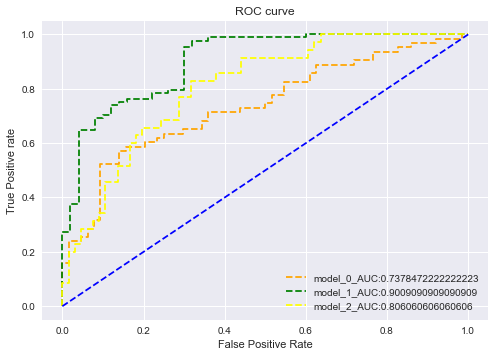

Mean Test Accuracy:67.96489816732444% with SD: 6.769678980096637%
Mean Train Accuracy:96.37358986746044%
Mean Test F1:70.86978275464764% with SD: 7.819706245197515%
Mean Test AUC:81.49389730639732% with SD: 6.686509954327569%


In [99]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_5/')

## Experiment 6: Healthy balanced

In [53]:
unique = np.unique(Data.iloc[:,73])
controls = np.array([i for i in unique if i.find("_C_") != -1])
B = pd.DataFrame()
for i in controls:
    B = B.append(Data[Data.iloc[:,73] == i])
# B.iloc[:,72] = 1
B.reset_index(inplace=True,drop=True )

In [54]:
male = [i for i in (np.unique(B.iloc[:,73])) if i.find("_M_")!=-1]
female = [i for i in (np.unique(B.iloc[:,73])) if i.find("_F_")!=-1]

In [59]:
D = pd.DataFrame()
for i in male:
    D= D.append(B[B.iloc[:,73] == i])

D.iloc[:,72] = 1

for i in female:
    D = D.append(B[B.iloc[:,73] == i])


In [60]:
count(list(np.unique(D.iloc[:,73])))

Total = 106
Asthmatic_male = 0
Asthmatic_female = 0
Healthy_Male = 55
Healthy_female = 51
Asthmatic_male_unique = 0
Asthmatic_female_unique = 0
Before_after = 0
Before_male = 0
Before_female = 0
after_male = 0
after_female = 0
NAsthma Male = 0
NAsthma Female = 0


In [62]:
D

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
12,-3.893985,0.572687,-4.793983,4.321371,-3.255843,4.285507,16.028996,-8.311204,1.898712,4.315015,...,8.258385,13.731505,19.915687,13.349181,10.691175,10.367954,12.069429,11.094227,1.0,4069_C_Na_M_Na_Na_N.json
13,-3.232222,3.584203,-2.980893,3.518197,-7.916225,3.159045,22.083429,-1.083314,-1.279730,8.614323,...,11.617264,13.372463,24.255529,8.296633,11.908956,11.929347,12.482357,10.737315,1.0,4069_C_Na_M_Na_Na_N.json
14,-3.859539,0.943058,-3.311861,2.698491,-10.561131,4.672471,22.973299,-1.519762,-0.747907,10.859635,...,15.763231,12.664140,25.500423,8.250928,10.050865,14.072169,11.269101,9.324992,1.0,4069_C_Na_M_Na_Na_N.json
15,-4.034124,-3.472480,-2.049349,2.492137,-12.479398,1.784643,21.529111,1.682565,-2.455797,9.402085,...,18.053306,13.998513,25.225018,8.779990,10.690393,14.236008,11.469774,10.045434,1.0,4069_C_Na_M_Na_Na_N.json
16,-4.419463,-4.382345,-2.675884,-1.494219,-14.594325,-1.364806,23.161474,3.109972,-3.432481,11.508955,...,18.460521,12.661386,27.302844,8.407359,11.059892,15.099476,8.959974,8.715867,1.0,4069_C_Na_M_Na_Na_N.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-5.465011,-5.639898,-15.867347,-8.618800,-4.599732,5.773786,-3.239729,-11.696196,5.177576,9.647619,...,8.707295,12.544646,8.889880,14.309047,11.471119,13.492273,10.770002,12.565704,0.0,4990_C_Na_F_Na_Na_Y.json
942,-5.009031,-8.761655,-17.820190,-11.764523,-7.343653,5.882544,1.047846,-8.825167,11.634549,13.318691,...,11.154579,16.149121,8.454930,13.019749,15.943259,15.776170,14.482855,11.625342,0.0,4990_C_Na_F_Na_Na_Y.json
943,-5.308129,-7.626101,-15.775032,-10.177991,-4.851155,8.189192,0.607152,-8.660771,5.639515,11.947866,...,9.776544,15.000798,8.472279,12.455581,13.888505,15.282378,12.513187,9.962481,0.0,4990_C_Na_F_Na_Na_Y.json
944,-5.238687,-9.631029,-16.944290,-10.912290,-3.519783,15.346384,2.292284,-7.098210,9.005689,11.721519,...,7.214838,17.804841,8.062948,11.061337,15.278315,14.870072,11.658958,9.809970,0.0,4990_C_Na_F_Na_Na_Y.json


In [61]:
male = shuffle(np.random.choice(male, size = 36, replace = False))
female = shuffle(np.random.choice(female, size = 31, replace = False))
for i in range(0,3):
    Test = []
    Test.append(list(np.concatenate((male[i*10:10+i*10],female[i*10:10+i*10]))))
    Train = np.setdiff1d(list(np.unique(D.iloc[:,73])),Test)
    np.savetxt(f"./male_female_classification/Experiment_6/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./male_female_classification/Experiment_6/Test/test_{str(i)}.txt", Test[0], '%s')

  0%|          | 0/3 [00:00<?, ?it/s]

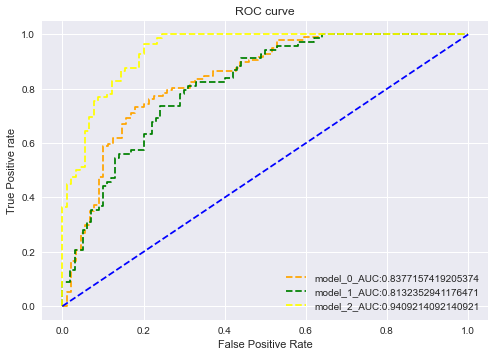

Mean Test Accuracy:77.16065921242216% with SD: 7.2407200187403955%
Mean Train Accuracy:97.88015687305523%
Mean Test F1:77.9602826205109% with SD: 7.126303927006079%
Mean Test AUC:86.39574817507588% with SD: 5.533177314523378%


In [63]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(D),'Experiment_6/')